# Regularization(Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch

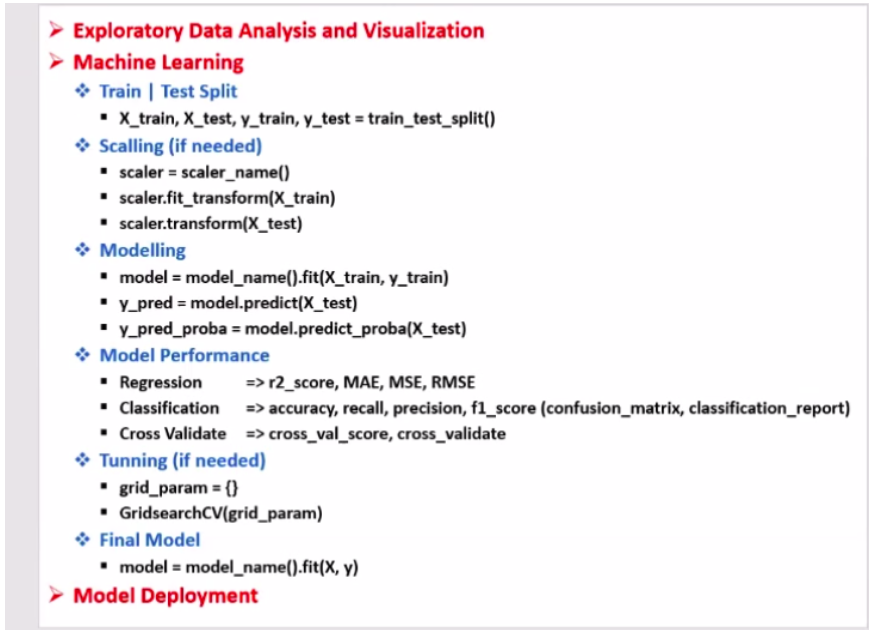
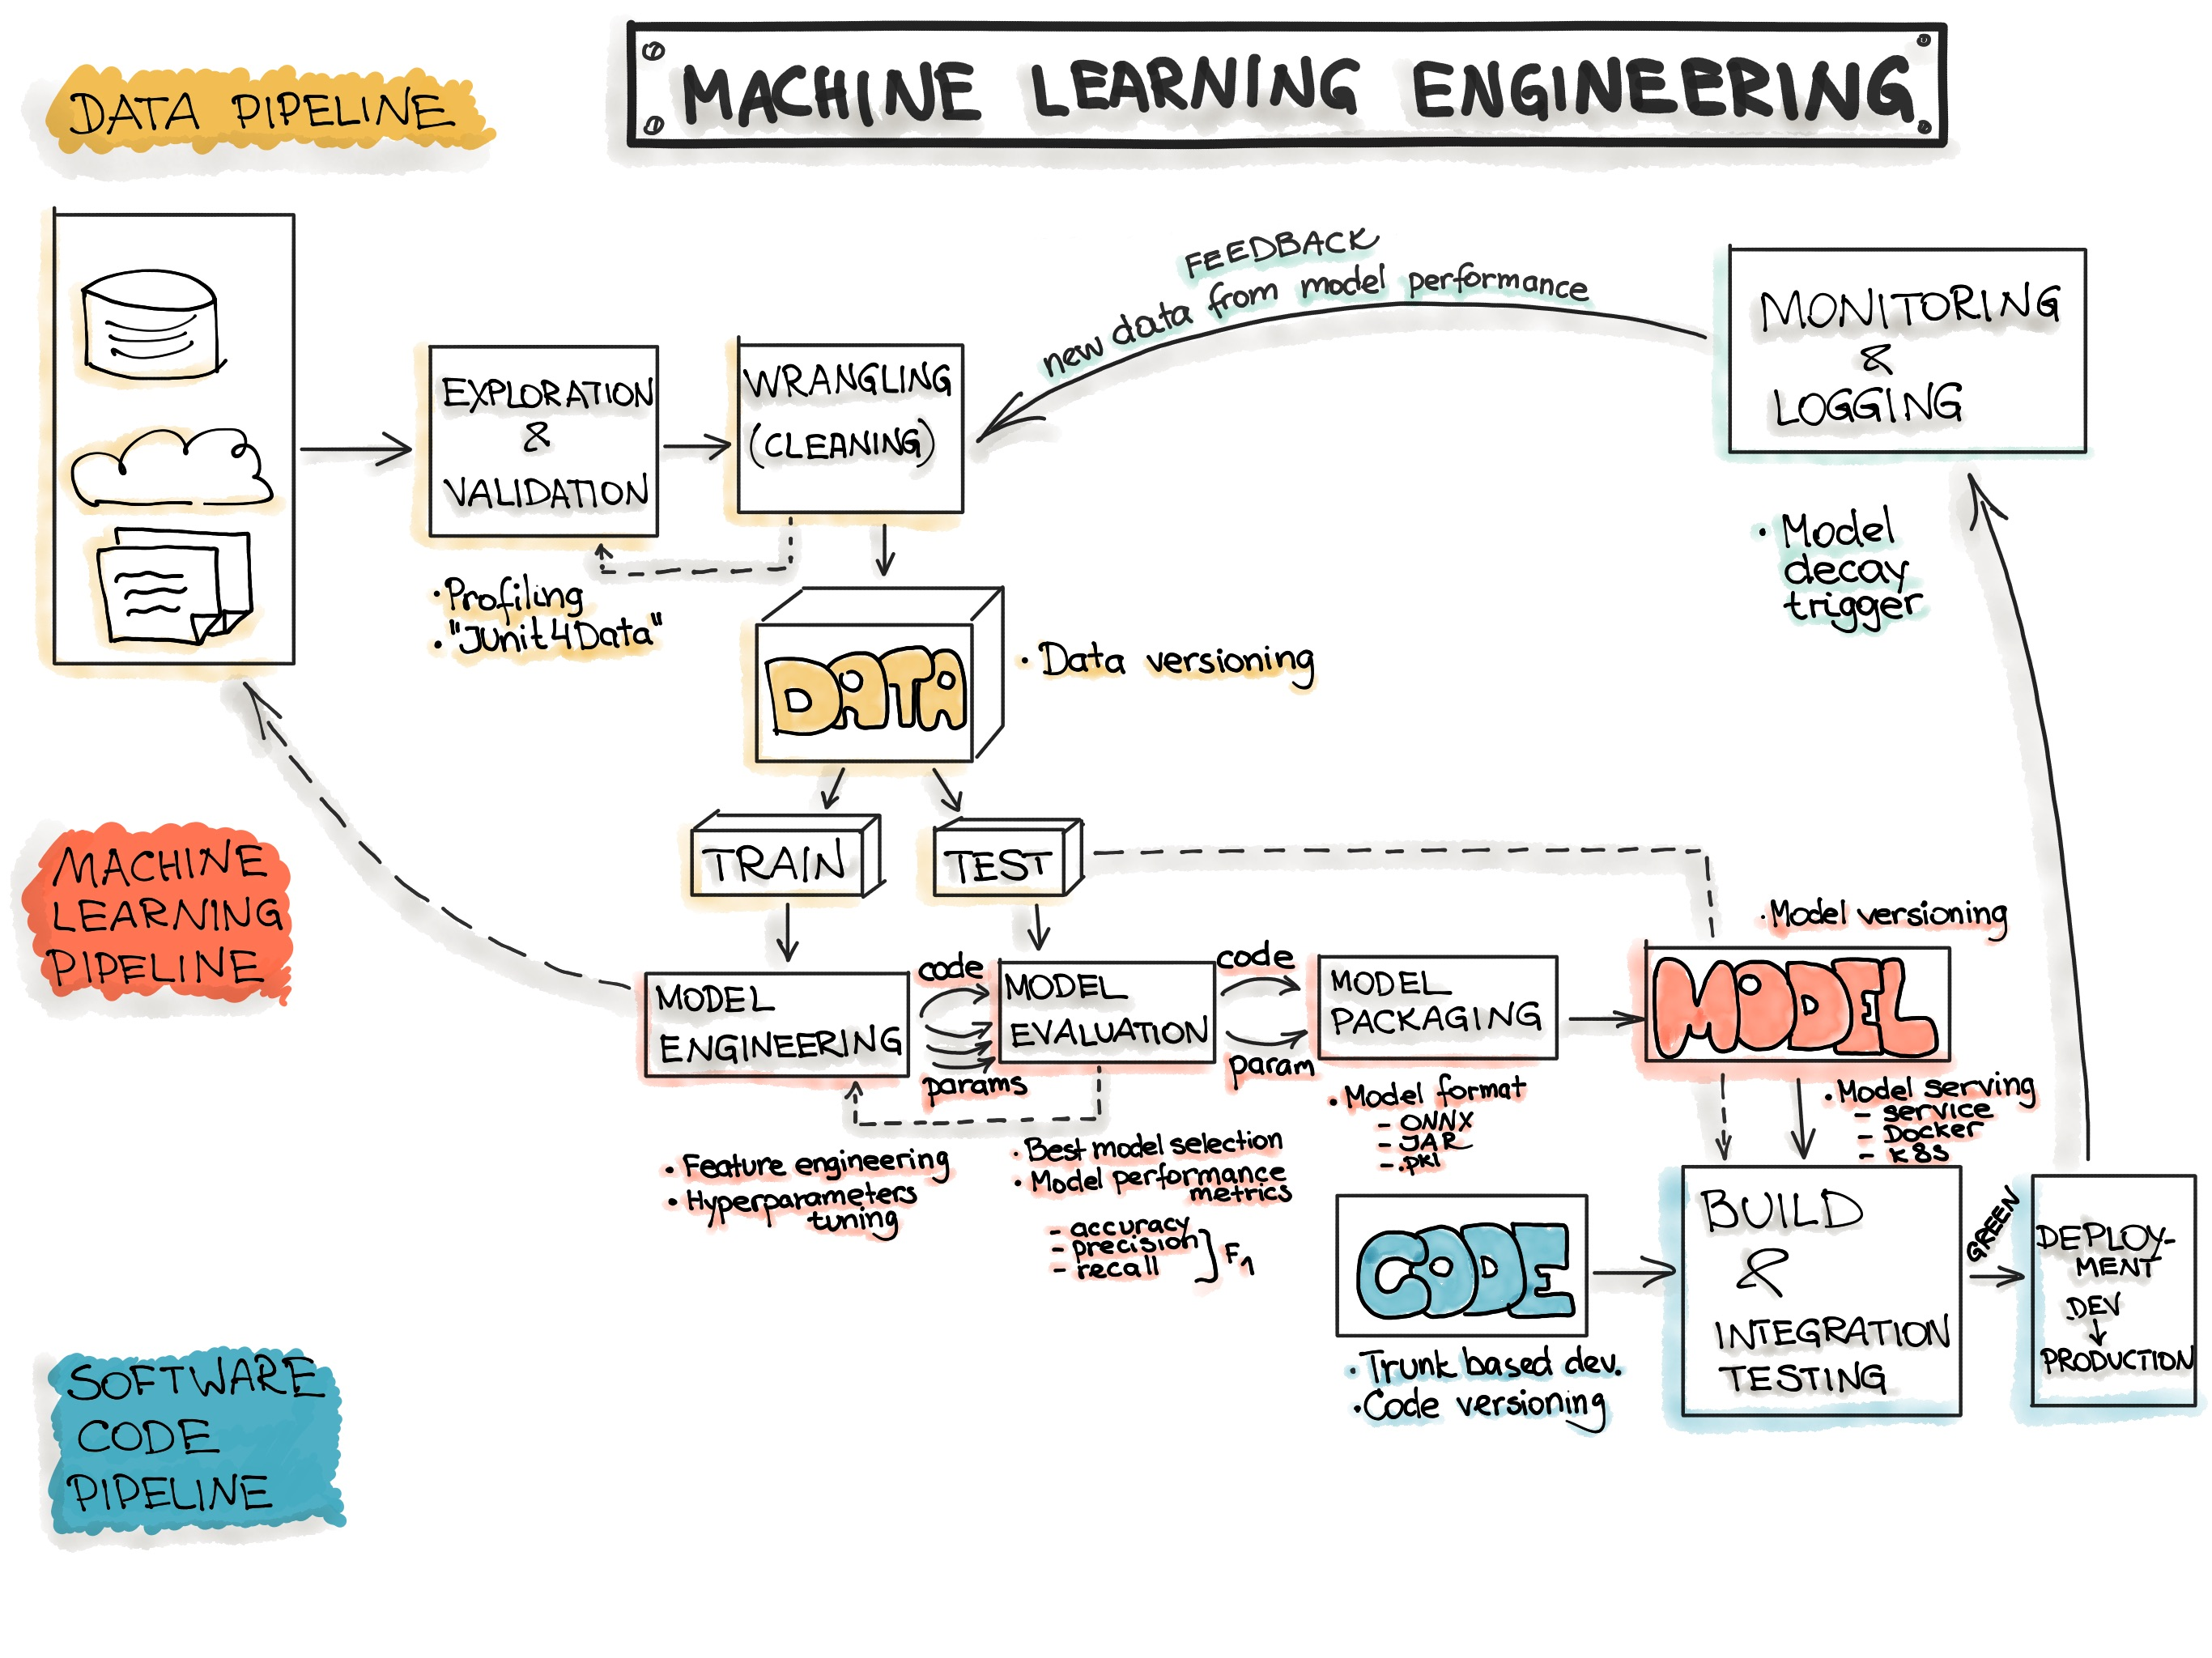

* Yukarıdaki görsel ML de data yı aldıktan sonra yapılacak işlemleri gösteriyor.
** Scale ing normalizasyon/regularizasyon ve standardizasyon işlemleri
https://thaddeus-segura.com/feature-scaling/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\DataScience\Techpro\ML\datalar\Advertising.csv")

In [3]:
X = df.drop("sales", axis =1)
y = df["sales"]

# Polynomial Conversion

In [4]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=5, include_bias=False) #polinom olarak 5. değeri aldık

poly_features = polynomial_converter.fit_transform(X)

In [5]:
poly_features.shape

(200, 55)

## Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# Bu kod ile datayı test ve train olarak ikiye bölüyoruz.

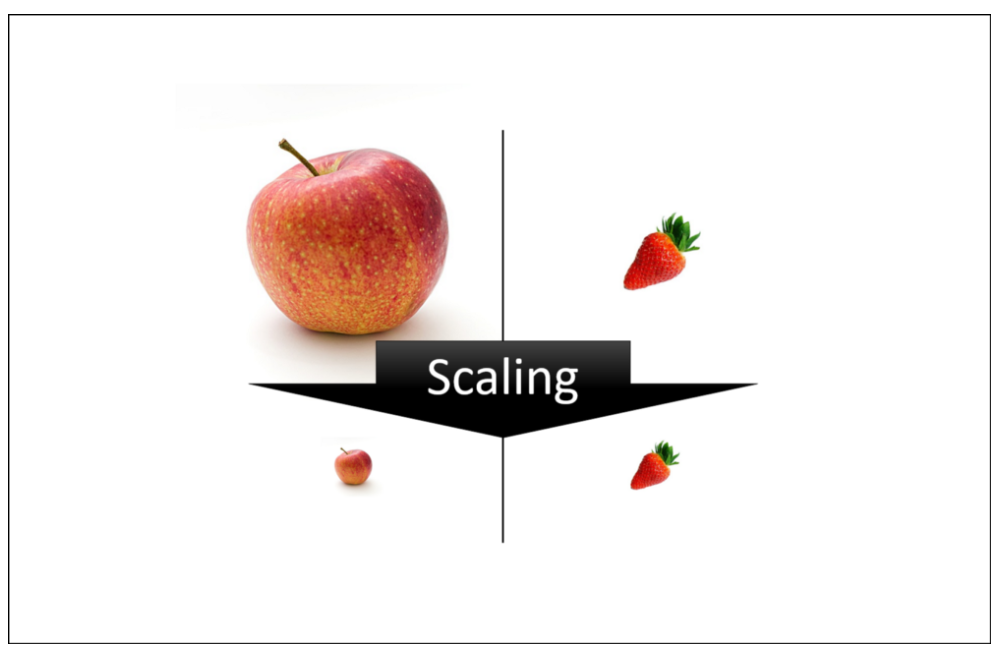

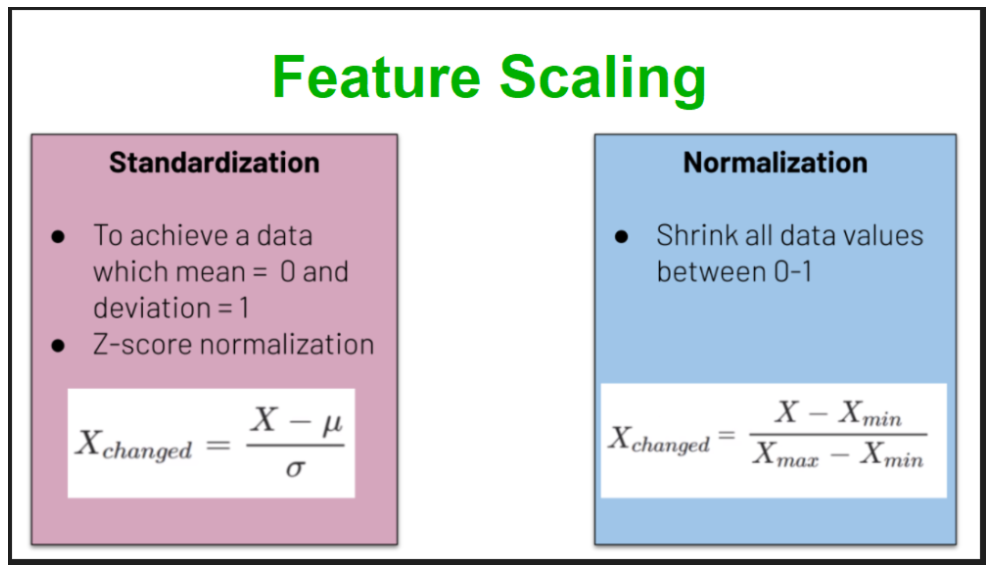

Makine öğrenmesi modellerinde, veri ön işleme aşamasında sıklıkla kullanılan iki yöntem standardizasyon ve normalizasyondur. Bu iki yöntem arasındaki farklar şu şekildedir:

Standardizasyon: Bu yöntem, verilerin ortalamasını 0 ve standart sapmasını 1'e dönüştürür. Yani veriler, bir normal dağılım şeklinde olacak şekilde ölçeklendirilir. Standardizasyon, tüm özelliklerin ortalaması ve standart sapması farklı olduğunda etkilidir.

Normalizasyon: Bu yöntem, verileri belirli bir aralığa (genellikle 0 ile 1 arasına) ölçeklendirir. Veriler, minimum ve maksimum değerleri dikkate alınarak ölçeklendirilir. Normalizasyon, verilerin büyük ölçekli farklılıklara sahip olduğu durumlarda etkilidir.

Yani, standardizasyon verileri ölçeğinde standart bir dağılıma dönüştürürken, normalizasyon verileri belirli bir aralığa sığdırır.

Hangi yöntemin kullanılacağı, verilerin özelliklerine ve modele bağlıdır. Genel olarak, makine öğrenmesi modelleri için veri ön işleme aşamasında verilerin ölçeklendirilmesi önemlidir, çünkü modelin performansını artırabilir ve aşırı uyma (overfitting) veya düşük performans gibi sorunları önleyebilir.

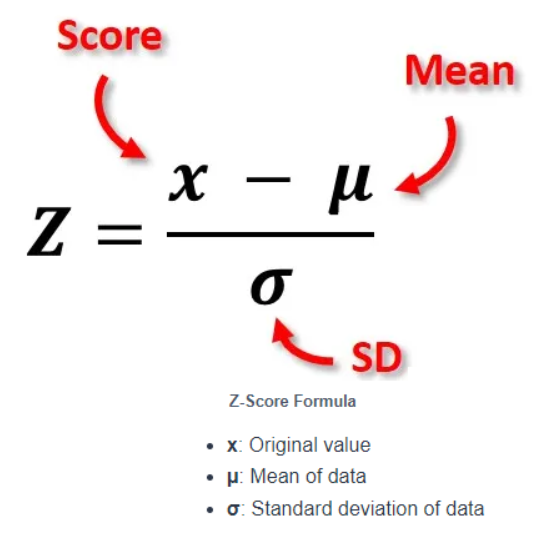

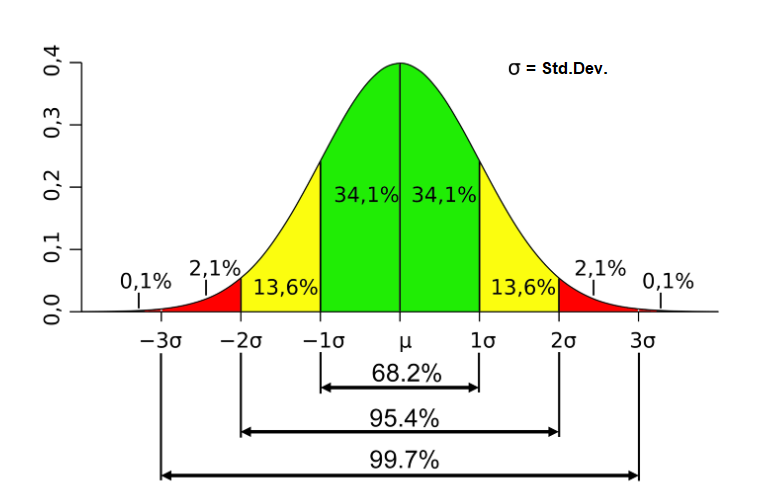

* Bir matematik sınav sonuçlarının olduğu veri setimiz olduğunu düşünelim. Bu sınav sonucunda ortalamanın (μ) 60 olduğu ve standart sapmanın (σ) ise 10 olduğu tespit edilmiştir. Eğer 49 ve altında puan alan oranını bulmak istersek standardizasyon işlemi sonrası z-puan tablosunu kullanabiliriz.
z=(49-60)/10
z puanımız standardizasyon işlemi sonucunda -1.1 olarak bulundu. z -puan tablosuna bakıldığında toplam popülasyonun %13.57'sinin 49 ve daha altında puan aldığı tespit edilmiştir.
Standardizasyon işlemini Python’da StandartScaler fonksiyonu ile yapabiliriz.


* Z-puanı, veri setindeki bir gözlemin ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir.
Pozitif z-skoru, gözlemin ortalamadan büyük olduğunu,
Negatif z-skoru, gözlemin ortalamadan küçük olduğunu,
Z-skorunun sıfır olması ise gözlemin ortalamaya eşit olduğunu ifade eder.

* Z dağılımı olarak da isimlendirilen standart normal dağılım, ortalamanın 0, standart sapmanın da 1’e eşit olduğu özel bir normal dağılımdır. Standart normal dağılım, z-puanı adı verilen standartlaştırılmış değerlerin normal dağılımıdır. Z-puanı standart sapma birimleriyle ölçülür.

Herhangi bir normal dağılım, verilerin standartlaştırılması ile z-dağılımına dönüştürülebilir. Verinin standartlaştırılması, hem farklı standart sapma ve ortalamaya sahip verilerin karşılaştırılmasını kolaylaştırır hem de kolaylıkla olasılık hesabı yapılmasına imkan sağlar. Farklı ölçek/büyüklüğe sahip veriler söz konusu olduğunda standardizasyon işlemi makine öğrenmesi modelleri için de kritiktir.

* Z score için başka bi örnek: Z score a bir ornek vermek gerekirse. Kendi akranlari ile yarisan bir yetiskin ve cocuk hayal edelim. Yetiskin 100 metreyi 60 saniye de kossun, cocuk ise 80 saniyede kossun. Yetiskin cocuktan daha iyi kosucudur diyemeyiz. Yaristaki siralamari daha fazla bilgi verir. 60 saniye ile yetiskin yarista sonuncu olmusken cocuk 8o saniye ile birinci olmus olabilir. Z score kendi grubu icinde bu sayinin yerini yuzde kactan iyi yuzde kactan kou oldugunu verir.

* https://www.omnicalculator.com/statistics#s-181

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()
#featureların önemini bulmak için scale yapmak önemli
# target e kesinlikle scale uygulanmaz. tereddüt varsa scale yapın

``StandardScaler:``Bu yöntem, verilerin ortalamasını 0 ve standart sapmasını 1'e dönüştürür. Bu işlem sonucunda veriler standart normal dağılım şeklinde olacak şekilde ölçeklendirilir. Tüm özelliklerin ortalaması ve standart sapması farklı olduğunda etkilidir.

``MinMaxScaler:`` Bu yöntem, verileri belirli bir aralığa (genellikle 0 ile 1 arasına) ölçeklendirir. Veriler, minimum ve maksimum değerleri dikkate alınarak ölçeklendirilir. Verilerin büyük ölçekli farklılıklara sahip olduğu durumlarda etkilidir.

``RobustScaler:`` Bu yöntem, verilerin ortanca değerini 0 ve çeyrekler aralığı (IQR) kullanarak ölçeklendirir. Bu yöntem, verilerdeki aşırı değerlerin varlığı durumunda daha güvenilirdir ve medyan ve çeyrekler aralığı gibi istatistiksel ölçümleri kullanarak bu değerlerin etkisini minimize etmeye çalışır.

* ``not:``
    - Hedef sütuna ölçekleme (scaling) işlemi uygulamak istenmez. Hedef sütununun ölçeklendirilmesi, modelin doğruluğunu azaltabilir veya yanıltıcı sonuçlara yol açabilir. Bu nedenle, özellikle regresyon problemleri için, hedef sütunu ölçeklendirmek yaygın bir uygulama değildir.

    - Aksine, diğer sütunlar, özellikle farklı ölçeklerdeki veriler içerdiklerinde ölçeklendirilmelidir. Özellikle, özellikler arasındaki büyük ölçekli farklılıklar, modelin öğrenme hızını yavaşlatabilir veya yanıltıcı sonuçlara yol açabilir. Bu nedenle, özelliklerin ölçeklendirilmesi, genellikle modelin performansını artırmak için yapılır.

    - Yani, özetle, hedef sütunu ölçeklendirme işlemi yapılmaz, ancak özelliklerin ölçeklendirilmesi modelin performansını artırabilir.

In [9]:
scaler.fit(X_train) # fit işlemini sadece train bölümüne yapıyoruz

StandardScaler()

In [10]:
X_train_scaled = scaler.transform(X_train) 
# bir üs satırda tutulan işlem bilgilerini x_tarin uygulayıp dönüştrüyoruz

X_train_scaled 
# train datası daha fazla olduğu için ilk önce ona scale işlemi uyguladık.
# daha sonra da test bölümünü scale ediyoruz.

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [11]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [12]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round().T # - yön bildiriyor

,mean,std
0,-0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,-0.0,1.0
4,0.0,1.0
5,-0.0,1.0
6,-0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,-0.0,1.0


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = lm.predict(X_test_scaled) # y_pred alırken yine scaled edilmiş test ve train datalarını alıyoruz
y_train_pred = lm.predict(X_train_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [17]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") #modelin adı
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


# Multicollinearity

* iki feature birbirine çok yakın değerler içeriyorsa o zaman bir featureyi test setimize almaya gerek yok.
    - eğer ikisinide alırsak model kompleksitesi artarken model kalitesi düşüyor
    - https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/#:~:text=Multicollinearity%20occurs%20when%20there%20are,effects%20on%20the%20dependent%20variable
    
    
* En basit tanımıyla ``multicollinearity bir değişkeni tahmin eden en az iki değişken arasında çok yüksek ilişkinin olması durumudur.`` 

Multicollinearity'nin varlığını tespit etmek için birkaç yöntem vardır:

* ``Korelasyon Matrisi:`` Bağımsız değişkenler arasındaki korelasyonları gösteren bir matristir. Matristeki yüksek korelasyonlu değişkenler, multicollinearity'nin varlığına işaret edebilir.

* ``VIF (Variance Inflation Factor):`` Bu yöntem, her bağımsız değişkenin diğer değişkenlerle olan ilişkisini ölçer. VIF değeri 1'den küçükse, multicollinearity yoktur. 1 ile 5 arasında bir değer, hafif multicollinearity olduğunu gösterirken, 5'ten büyük bir değer, ciddi bir multicollinearity problemi olduğunu gösterir.

* ``Tolerance:`` VIF değerinin tersidir. Tolerance değeri 1'e yakın olduğunda, multicollinearity yoktur. Tolerance değeri küçüldükçe, multicollinearity artar.

* ``Eigenvalues:`` Eigenvalues yöntemi, korelasyon matrisinin determinantının 0'a yakın olması durumunda multicollinearity olduğunu gösterir.

Bu yöntemler arasından seçim yapılabilir. VIF ve tolerance, en yaygın kullanılan yöntemlerdir. VIF ve tolerance değerleri, genellikle 5'ten büyük veya 1'den küçük olduğunda, multicollinearity sorunu olduğu kabul edilir. Ancak, bu sınır değerler modelin özelliklerine ve veri kümesine bağlı olarak değişebilir, bu nedenle her durum için ayrı ayrı değerlendirme yapılmalıdır.

In [ ]:
# Örnek kodlar:
# Korelasyon Matrisi
import pandas as pd

data = pd.read_csv("veri.csv")
corr_matrix = data.corr()
print(corr_matrix)

# VIF (Variance Inflation Factor):
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv("veri.csv")
X = data.drop("hedef_sutun", axis=1)# Hedef sütun hariç tüm özellikler VIF hesaplamasına dahil edilir.
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


# Tolerance:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv("veri.csv")
X = data.drop("hedef_sutun", axis=1) # Hedef sütun hariç tüm özellikler VIF hesaplamasına dahil edilir.
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data["tolerance"] = 1/vif_data["VIF"]
print(vif_data)


# Eigenvalues:
data = pd.read_csv("veri.csv")
corr_matrix = data.corr()
eigenvalues = np.linalg.eigvals(corr_matrix)
print(eigenvalues)


In [ ]:
# Tolerans hem de VIF değerleri için örnek kodlar:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Veri setini oluşturma
df = pd.DataFrame({'age': [30, 32, 25, 35, 20],
                   'income': [40000, 60000, 80000, 120000, 20000],
                   'education': ['Bachelors', 'Masters', 'PhD', 'Masters', 'Bachelors']})

# Sabit bir terim ekleyin
df = add_constant(df)

# Tolerans değerleri
tolerance = 1.0 - np.abs(np.linalg.det(df.corr().values))
print(tolerance)

# Tolerans değeri, bir özelliğin diğer özellikler tarafından açıklanan varyansın yüzdesidir. 
# Tolerans değeri 1'e yakınsa, bir özellik diğer özellikler tarafından fazla açıklanmamıştır ve bir multicollinearity sorunu yoktur. 
# Ancak tolerans değeri küçükse, bir özellik diğer özellikler tarafından çok fazla açıklanmaktadır ve bir multicollinearity sorunu vardır.


# veya
# VIF değerleri
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
print(vif)

# VIF, bir özellik için diğer özelliklerin etkilerinin yüzdesini hesaplar. 
# VIF değeri 1'e yakınsa, bir özellik diğer özellikler tarafından fazla açıklanmamıştır ve bir multicollinearity sorunu yoktur. 
# Ancak VIF değeri büyükse, bir özellik diğer özellikler tarafından çok fazla açıklanmaktadır ve bir multicollinearity sorunu vardır.

In [18]:
pd.DataFrame(poly_features).corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

In [19]:
# function for set text color of positive
# values in Dataframes
def color_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: green'` for positive
    strings, black otherwise.
    """
    if (0.90 < val < 1 ) or (-1 < val < -0.90):
        color = 'red'
    elif val == 1:
        color= 'Blue'
    else:
        color = 'White'
    return 'color: %s' % color


#https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/ 
 #   bu sitedeki kodları uyarlama yapacağız.

In [41]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.054809,0.056648,0.967662,0.662160,0.603099,0.050844,0.046222,0.055626,0.912265,0.721105,0.650492,0.515275,0.466823,0.420083,0.048734,0.039665,0.028958,0.039409,0.855073,0.709761,0.630912,0.584542,0.516807,0.460056,0.437080,0.409771,0.364701,0.315533,0.046959,0.032900,0.017709,0.008777,0.020708,0.801581,0.680833,0.596879,0.588127,0.506564,0.447078,0.505741,0.462847,0.403394,0.346404,0.384146,0.373602,0.343453,0.286909,0.243084,0.045768,0.026080,0.007613,-0.004329,-0.007060,0.004975
1,0.054809,1.000000,0.354104,0.078644,0.681392,0.250204,0.966752,0.708347,0.352336,0.085030,0.548158,0.217652,0.738807,0.549689,0.259887,0.912163,0.738767,0.538912,0.296300,0.084899,0.473991,0.201889,0.615548,0.449913,0.218735,0.725701,0.596713,0.435679,0.221477,0.858447,0.728288,0.578239,0.405678,0.233682,0.082679,0.420642,0.191371,0.539663,0.389348,0.198233,0.616497,0.492912,0.353459,0.181827,0.697530,0.604193,0.480872,0.335472,0.178656,0.809579,0.705871,0.590660,0.441864,0.300963,0.183753
2,0.056648,0.354104,1.000000,0.076442,0.251706,0.710860,0.361405,0.846215,0.939677,0.087403,0.223935,0.586885,0.277229,0.649722,0.744348,0.348591,0.756600,0.848977,0.820403,0.093523,0.216804,0.523625,0.251371,0.545914,0.618126,0.270379,0.595505,0.681096,0.683016,0.329318,0.689047,0.792878,0.765061,0.697417,0.097150,0.214929,0.480870,0.244256,0.490294,0.547514,0.247790,0.509593,0.561287,0.560250,0.253301,0.548691,0.643265,0.634693,0.606379,0.308883,0.629623,0.744772,0.740034,0.661761,0.595177
3,0.967662,0.078644,0.076442,1.000000,0.655610,0.604786,0.074717,0.077064,0.085473,0.984478,0.754241,0.688295,0.515837,0.483686,0.441567,0.069934,0.072344,0.066860,0.071437,0.952132,0.772650,0.694074,0.615256,0.560653,0.504148,0.439513,0.430431,0.395637,0.346060,0.064975,0.064502,0.058043,0.047638,0.050892,0.914302,0.763650,0.675974,0.643078,0.569615,0.506698,0.533678,0.507202,0.453477,0.391984,0.386548,0.394148,0.376481,0.324503,0.277483,0.060771,0.055516,0.048174,0.037872,0.028539,0.031722
4,0.662160,0.681392,0.251706,0.655610,1.000000,0.593723,0.664399,0.485959,0.241570,0.627090,0.965952,0.613323,0.962962,0.777374,0.490596,0.631071,0.502268,0.356248,0.190696,0.594024,0.910381,0.596252,0.951173,0.762204,0.504128,0.905034,0.783817,0.618268,0.392485,0.597633,0.490224,0.372765,0.250397,0.138198,0.561829,0.853111,0.571575,0.906957,0.717061,0.487728,0.905252,0.771478,0.605065,0.401054,0.848834,0.767547,0.645128,0.482578,0.309573,0.567146,0.470411,0.371193,0.262030,0.169913,0.097704
5,0.603099,0.250204,0.710860,0.604786,0.593723,1.000000,0.253924,0.576143,0.663457,0.587286,0.627367,0.969091,0.538715,0.867956,0.937710,0.241838,0.504354,0.558658,0.564313,0.564874,0.627426,0.921108,0.583577,0.860898,0.909793,0.489275,0.786042,0.847498,0.826914,0.224767,0.448703,0.503393,0.481855,0.460299,0.542113,0.617954,0.873051,0.594081,0.826298,0.859458,0.536670,0.794702,0.826686,0.797872,0.443163,0.720646,0.800253,0.764051,0.714386,0.207342,0.399518,0.456294,0.445350,0.396279,0.372849
6,0.050844,0.966752,0.361405,0.074717,0.664399,0.253924,1.000000,0.717856,0.356512,0.081937,0.536793,0.221874,0.768358,0.554347,0.259786,0.985102,0.783297,0.552534,0.297371,0.082618,0.465376,0.206476,0.640765,0.454135,0.219410,0.787473,0.628876,0.439364,0.217841,0.955280,0.798072,0.614792,0.414209,0.232155,0.080961,0.413689,0.196065,0.561681,0.393295,0.199027,0.668950,0.518426,0.355656,0.179322,0.779714,0.658326,0.503108,0.333459,0.172715,0.921100,0.792812,0.646188,0.465716,0.303686,0.180208
7,0.046222,0.708347,0.846215,0.077064,0.485959,0.576143,0.717856,1.000000,0.834543,0.095289,0.411600,0.485136,0.543085,0.756910,0.620568,0.695496,0.977682,0.941437,0.743549,0.107359,0.378923,0.445148,0.471052,0.633268,0.518778,0.539793,0.763229,0.738939,0.573946,0.664420,0.935782,0.944307,0.819946,0.636391,0.116108,0.358969,0.420758,0.435308,0.565920,0.469426,0

# Cross Validation

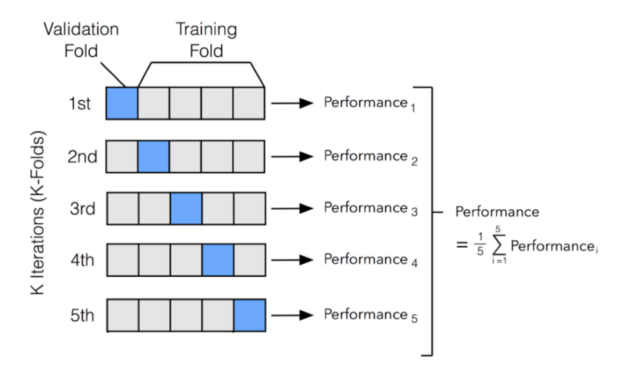

* CV işlemi datanın farklı farklı bölümlerinden test seti oluşturuyor ve onun verilerine göre bir modelleme yapıyor.
* bu işlem datadaki problemleri aşmak için çok verimli çünkü randomize olarak alınan veriler en doğru sonucu verecektir. 
    - Yukarı daki resim de toplamda 5 farklı şekilde bu işlemin yapıldığını görebiliyoruz. Bütün işlemleri yaptıktan sonra 5 defa olduğu değerleri 5 e bölüp bize bi sonuç veriyor. Değerler birbirine yakın çıkıyorsa o zaman problem yok demektir. Aynı çıkmıyorsa o zaman datada sıkıntı olduğunu görmüş oluyoruz. 



In [21]:
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_validate, cross_val_score

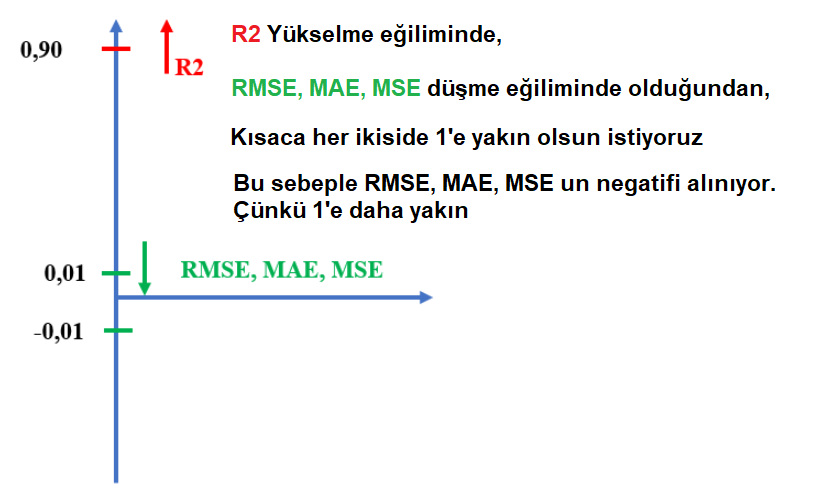

* Performans ölçütleri seçilirken, hata ölçütlerinden biri olan ``MSE, MAE ve RMSE`` gibi değerlerin negatif formu da kullanılabilir. Bu negatif değerler, skorların negatif değerler olarak hesaplanmasına neden olur.

* Bunun nedeni, cross_validate() fonksiyonunun varsayılan davranışının, performans ölçütleri değerlerinin artmasıyla daha iyi model performansını ifade etmesi gerektiğidir. R-kare (R-squared), modelin açıklama gücünü ölçen bir performans ölçütüdür. R-kare değeri, bağımsız değişkenlerin, bağımlı değişkenin varyansındaki yüzde kaçını açıklayabildiğini ifade eder. R-kare değeri, 0 ile 1 arasında bir değer alır. 1'e yaklaştıkça, modelin bağımsız değişkenlerin bağımlı değişkendeki değişkenliği açıklama gücü artar ve daha iyi bir performans gösterir.

    - ``Bu nedenle, R-kare ölçütünde daha büyük bir değer, daha iyi bir performansı ifade eder. Diğer taraftan, hata ölçütleri olan MSE, MAE ve RMSE gibi ölçütlerde, daha düşük bir değer daha iyi bir performansı ifade eder. Bu nedenle, bu hata ölçütleri negatif olarak hesaplanarak, daha düşük bir değer daha iyi bir performansı ifade ettiği kabul edilir.``



In [25]:
model = LinearRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error',
                                                                   'neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)
# cv = 5 değeri default değer

In [26]:
pd.DataFrame(scores, index = range(1,6)) # görüntü için 1 den itibaren sıralasın diye bıraktık
# ilk iki sütun bizi ilgilendirmiyor.

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003006,0.001997,0.367902,-1.271247,-19.204259,-4.382266
2,0.002995,0.002001,0.879658,-0.710463,-2.713292,-1.647207
3,0.001998,0.001999,0.977560,-0.395033,-0.622901,-0.789240
4,0.002020,0.002983,0.989369,-0.418977,-0.289361,-0.537923
5,0.002000,0.001999,0.166596,-1.474093,-15.409856,-3.925539


In [27]:
pd.DataFrame(scores)["test_r2"].mean()

0.6762170847084183

In [28]:
scores = pd.DataFrame(scores, index=range(1,6)) #0 dan başlatmasın diye 1 verdim indexe
scores.iloc[:, 2:].mean()

# cv ile datanın aslında bozuk olduğunu görmüş olduk. 👇 gerçek değerler bu şekilde:  

test_r2                             0.676217
test_neg_mean_absolute_error       -0.853963
test_neg_mean_squared_error        -7.647934
test_neg_root_mean_squared_error   -2.256435
dtype: float64

In [29]:
# ilk durumda datanın durumu:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


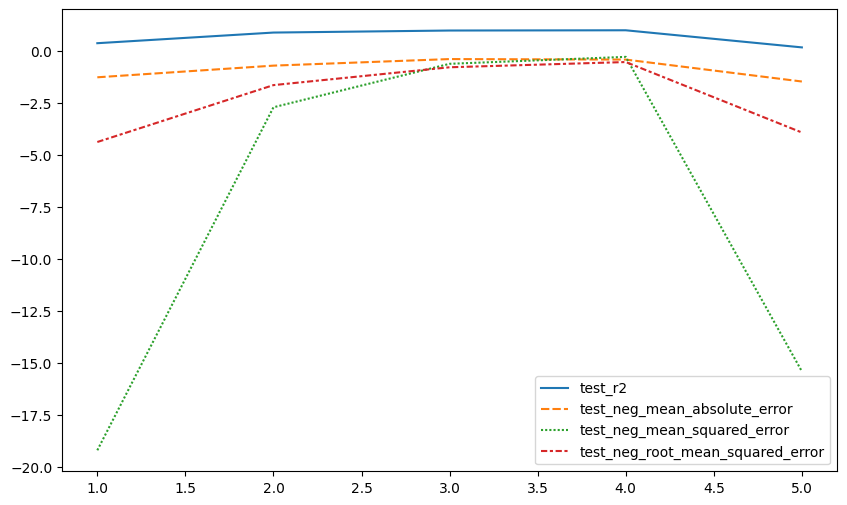

In [30]:
sns.lineplot(data = scores.iloc[:,2:]);
plt.show()

In [31]:
lm.coef_ # bunlar modeldeki açıklayıcı değişkenlerin katsayıları dolayısıyla - değerler kötü etki ediyor denebilir

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [32]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


# Ridge Regression

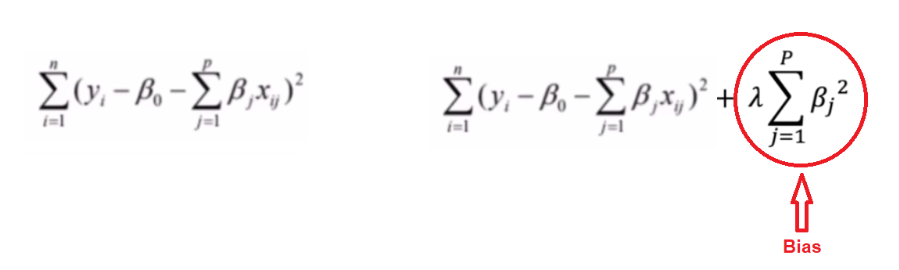

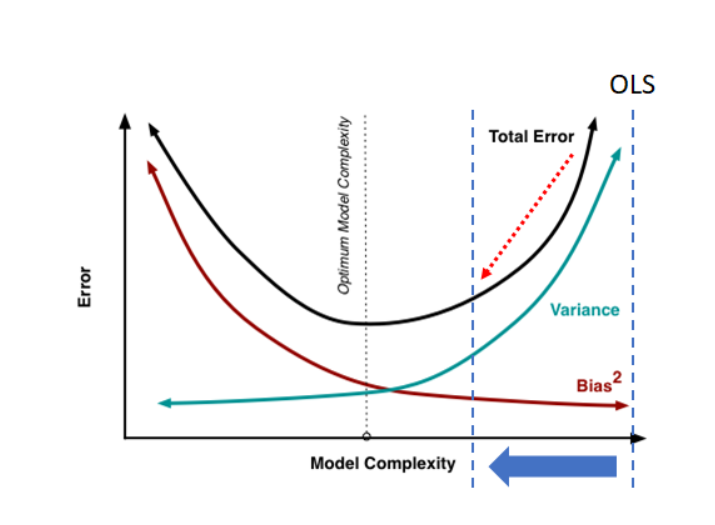

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_model = Ridge(alpha=1, random_state=42) # alpha değeri ilerde irdelenecek

In [35]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [36]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [37]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [38]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.997607,0.764990,0.988677,0.982511
mae,0.186213,0.665959,0.338149,0.482446
mse,0.062968,6.634847,0.297970,0.493743
rmse,0.250934,2.575820,0.545866,0.702669


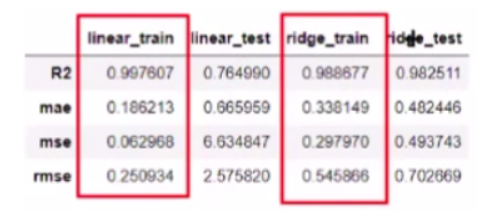

# For Ridge Regression CV with alpha : 1

* burada yeni işlemler için yukarıda yaptığımız işlemleri sıfırlamamız gerekti. Sıfırlama kodumuz da aşağıda

In [39]:
model = Ridge(alpha=1, random_state=42) #
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                             'neg_root_mean_squared_error'], cv=5)

In [40]:
pd.DataFrame(scores, index = range(1, 6))
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.977591
test_neg_mean_absolute_error       -0.443539
test_neg_mean_squared_error        -0.571224
test_neg_root_mean_squared_error   -0.710160
dtype: float64

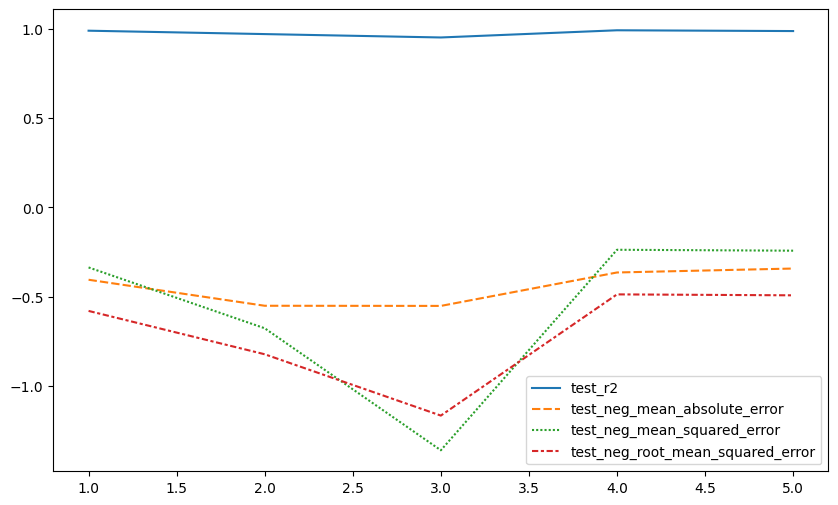

In [41]:
sns.lineplot(data = scores.iloc[:,2:])
plt.show()

In [42]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [43]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [44]:
rm_df # ridge regression katsayılarda değişiklik yapıyor. düşük değerler daha da düşebiliyor.

,ridge_coef_1
0,3.428822
1,0.689086
2,0.170305
3,-0.910850
4,2.723077
5,0.112909
6,-0.404686
7,0.287950
8,-0.091937
9,-1.014535


In [45]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


# Choosing best alpha value with Cross-Validation

* ``Ridge regresyonu``, aşırı uydurma (overfitting) sorununu önlemek için kullanılan bir regresyon yöntemidir. Ridge regresyonu, standart lineer regresyon yöntemiyle benzerdir, ancak Ridge regresyonunda, hata terimine eklenen bir ceza terimi vardır. Bu ceza terimi, modelin karmaşıklığını azaltarak, aşırı uydurma sorununu önler.

* ``Bu ceza terimi için kullanılan parametre, alpha olarak adlandırılır``. ``Alpha`` değeri, Ridge regresyonu modelinin ceza teriminin şiddetini kontrol eder.

* Daha büyük alpha değerleri, ceza teriminin daha güçlü olduğu ve modelin daha az esnek olduğu anlamına gelir. Bu da modelin overfitting sorununu önlemesine ve daha iyi bir genelleştirme performansı göstermesine neden olabilir.

Daha küçük alpha değerleri, ceza teriminin daha zayıf olduğu ve modelin daha esnek olduğu anlamına gelir. Bu da modelin daha fazla uyarlanmasına ve eğitim verilerine daha iyi uymasına neden olabilir, ancak genelleştirme performansı düşük olabilir.

``Alpha değeri, bir hiperparametre olduğu için, genellikle çapraz doğrulama (cross-validation) yöntemiyle belirlenir.`` Farklı alpha değerleri için Ridge regresyonu modelleri oluşturulur ve en iyi performansı veren alpha değeri seçilir. Bu şekilde, Ridge regresyonu modelinin optimum alpha değeri bulunarak, aşırı uydurma sorunundan kaçınılır ve daha iyi bir genelleştirme performansı elde edilir.

In [46]:
from sklearn.linear_model import RidgeCV

In [47]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [48]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [49]:
ridge_cv_model.fit(X_train_scaled, y_train)

ridge_cv_model.alpha_ # bu model için en iyi alpha değerini vermiş olacak

0.02

In [50]:
ridge_cv_model.best_score_ # cv sonrası en iyi alpha değeri 

-0.65304065195516

In [51]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [52]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [53]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [54]:
pd.concat([ls, rs, rcs], axis = 1)


,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561


In [55]:
ridge_cv_model.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445637e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460874e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199235e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [56]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.02"])

In [57]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


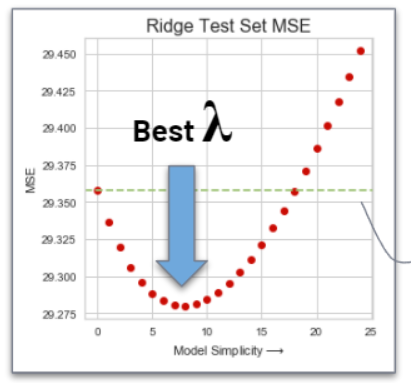

alpha büyüdükçe katsayılar 0 ' a yaklaşır

# LASSO

* ``Lasso regresyonu`` da Ridge regresyonu gibi aşırı uydurma sorununu önlemek için kullanılan bir regresyon yöntemidir. Lasso regresyonunda da, hata terimine eklenen bir ceza terimi vardır, ancak bu ceza terimi, ``Ridge regresyonundan farklı olarak L1 cezasıdır``.

Lasso regresyonu, Ridge regresyonundan farklı olarak, özellik seçimi yapar. Lasso regresyonu, özellik katsayılarını sıfıra indirerek, modeldeki gereksiz özellikleri çıkarmayı amaçlar. Bu sayede, modelin karmaşıklığı azaltılır ve daha iyi bir genelleştirme performansı elde edilir.

Lasso regresyonu da, Ridge regresyonu gibi, ceza teriminin şiddetini kontrol eden bir hiperparametre olan alpha parametresine sahiptir. Daha büyük alpha değerleri, ceza teriminin daha güçlü olduğu ve modelin daha az esnek olduğu anlamına gelir. Bu durumda, daha az özellik seçilebilir ve model daha basit hale gelebilir.

Daha küçük alpha değerleri, ceza teriminin daha zayıf olduğu ve modelin daha esnek olduğu anlamına gelir. Bu durumda, daha fazla özellik seçilebilir ve model daha karmaşık hale gelebilir.

Lasso regresyonunda da, alpha değeri genellikle çapraz doğrulama (cross validation) yöntemiyle belirlenir. Farklı alpha değerleri için Lasso regresyonu modelleri oluşturulur ve en iyi performansı veren alpha değeri seçilir. Bu şekilde, Lasso regresyonu modelinin optimum alpha değeri bulunarak, gereksiz özelliklerin çıkarılmasıyla aşırı uydurma sorunundan kaçınılır ve daha iyi bir genelleştirme performansı elde edilir.

In [58]:
from sklearn.linear_model import Lasso, LassoCV

In [59]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [60]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [61]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044


In [62]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], cv=5)

In [63]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.003002,0.001998,0.924246,-1.155268,-2.301550,-1.517086
2,0.001999,0.001002,0.955624,-0.656358,-1.000530,-1.000265
3,0.001000,0.001999,0.888327,-1.072936,-3.099952,-1.760668
4,0.001999,0.001001,0.896199,-1.255165,-2.825429,-1.680901
5,0.001000,0.002000,0.903545,-1.056538,-1.783470,-1.335466


In [64]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.913588
test_neg_mean_absolute_error       -1.039253
test_neg_mean_squared_error        -2.202186
test_neg_root_mean_squared_error   -1.458877
dtype: float64

In [65]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


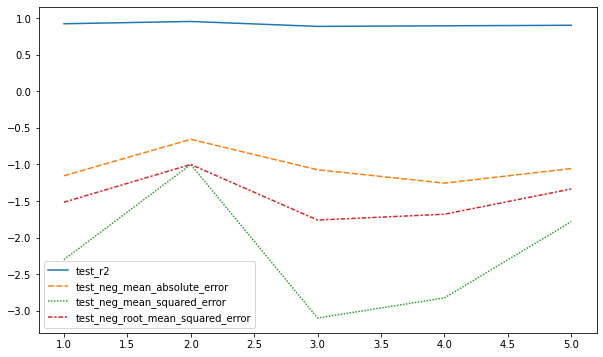

In [104]:
sns.lineplot(data = scores.iloc[:,2:]);

In [66]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [67]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])


pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1
0,13.942084,3.428822,6.383047,0.696016
1,-3.147845,0.689086,0.709275,0.000000
2,0.622117,0.170305,0.478838,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000
4,17.227695,2.723077,3.997813,3.490946
5,-3.875031,0.112909,-0.714940,0.000000
6,14.688014,-0.404686,-0.509197,0.000000
7,0.835494,0.287950,0.727012,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000
9,115.503087,-1.014535,2.244645,0.000000


# Choosing best alpha value with Cross-Validation

In [68]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [69]:
lasso_cv_model.fit(X_train_scaled,y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [70]:
lasso_cv_model.alpha_

0.01

In [71]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99], dtype=int64),)

In [72]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [73]:
lasso_cv_model.mse_path_

array([[2.30154971, 1.00052954, 3.09995194, 2.82542881, 1.78347009],
       [2.27241089, 0.98732363, 3.0715778 , 2.79436098, 1.75871518],
       [2.24354622, 0.97429271, 3.04348405, 2.76352248, 1.73384154],
       [2.21495512, 0.96164957, 3.01565157, 2.73293763, 1.709584  ],
       [2.18663758, 0.94912446, 2.98808001, 2.70260667, 1.68521331],
       [2.1585936 , 0.93698299, 2.96076935, 2.67252963, 1.66145044],
       [2.13082319, 0.92496319, 2.93371961, 2.64270648, 1.63758266],
       [2.10332633, 0.91332338, 2.90693077, 2.61313725, 1.61413601],
       [2.07610304, 0.90180887, 2.88040285, 2.58382192, 1.59094408],
       [2.0491533 , 0.89067073, 2.85413584, 2.55476049, 1.56800169],
       [2.02247713, 0.87966153, 2.82812973, 2.52595297, 1.54530871],
       [1.99607452, 0.86896413, 2.80238454, 2.49739936, 1.52286513],
       [1.96994547, 0.8585198 , 2.77690026, 2.46909965, 1.50067094],
       [1.94408998, 0.84832724, 2.75167688, 2.44105385, 1.47872615],
       [1.91850805, 0.83838642, 2.

In [74]:
lasso_cv_model.mse_path_[99].mean()

0.4118332980702015

In [75]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [76]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028


In [77]:
lasso_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [78]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [79]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df,lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01
0,13.942084,3.428822,6.383047,0.696016,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000


# Elastic net

* ``Elastic Net regresyonu``, hem Ridge hem de Lasso regresyonlarının avantajlarını bir araya getiren bir regresyon yöntemidir. Elastic Net regresyonu, hata terimine eklenen bir ceza terimi içerir ve hem L1 (Lasso) hem de L2 (Ridge) cezalarını kullanarak, hem özellik seçimi hem de aşırı uydurma sorununu kontrol eder. ``Elastic Net regresyonu, Ridge ve Lasso regresyonlarının hiperparametrelerini değiştirerek, modelin ceza terimi şiddetini kontrol eder. Elastic Net regresyonunun iki hiperparametresi vardır: alpha ve l1_ratio.``

* ``alpha parametresi``, hem L1 hem de L2 cezalarının şiddetini kontrol eder. Daha büyük alpha değerleri, ceza teriminin daha güçlü olduğu ve modelin daha az esnek olduğu anlamına gelir. Bu durumda, daha az özellik seçilebilir ve model daha basit hale gelebilir.

- ``l1_ratio parametresi``, L1 ve L2 cezaları arasındaki oranı kontrol eder. l1_ratio değeri 1 ise, Elastic Net regresyonu, Lasso regresyonuna eşdeğerdir. l1_ratio değeri 0 ise, Elastic Net regresyonu, Ridge regresyonuna eşdeğerdir.

Elastic Net regresyonunda, alpha ve l1_ratio değerleri genellikle çapraz doğrulama (cross validation) yöntemiyle belirlenir. Farklı alpha ve l1_ratio değerleri için Elastic Net regresyonu modelleri oluşturulur ve en iyi performansı veren alpha ve l1_ratio değerleri seçilir. Bu şekilde, Elastic Net regresyonu modelinin optimum alpha ve l1_ratio değerleri bulunarak, aşırı uydurma sorunundan kaçınılır ve gereksiz özelliklerin çıkarılmasıyla daha iyi bir genelleştirme performansı elde edilir.

In [81]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [82]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) # burada l1_ratio diye yeni bir parametre görüyoruz.
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [83]:
es  = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

In [84]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,0.542308,0.622028


# For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [85]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], cv=5)

In [86]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.915497,-1.255282,-2.567362,-1.602299
2,0.928138,-0.960011,-1.620225,-1.272881
3,0.855390,-1.373843,-4.014250,-2.003559
4,0.875648,-1.431847,-3.384817,-1.839787
5,0.840262,-1.449269,-2.953597,-1.718603


In [87]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.882987
test_neg_mean_absolute_error       -1.294050
test_neg_mean_squared_error        -2.908050
test_neg_root_mean_squared_error   -1.687426
dtype: float64

In [88]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [89]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [90]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [91]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000


# Choosing best alpha and l1_ratio values with Cross-Validation

In [148]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5,
                                max_iter = 100000,random_state=42)

In [152]:
elastic_cv_model.fit(X_train_scaled,y_train)
elastic_cv_model.alpha_

0.01

In [153]:
elastic_cv_model.l1_ratio_

1.0

In [154]:
elastic_cv_model.mse_path_[5][-1].mean()

0.41183329807022073

In [155]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [156]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


In [157]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.997607,0.764990,0.988677,0.982511,0.994491,0.983643,0.919650,0.918590,0.988824,0.986295,0.988824,0.986295,0.988824,0.986295
mae,0.186213,0.665959,0.338149,0.482446,0.244842,0.442087,1.018355,1.017959,0.339065,0.440975,0.339065,0.440975,0.339065,0.440975
mse,0.062968,6.634847,0.297970,0.493743,0.144977,0.461803,2.114491,2.298390,0.294098,0.386919,0.294098,0.386919,0.294098,0.386919
rmse,0.250934,2.575820,0.545866,0.702669,0.380758,0.679561,1.454129,1.516044,0.542308,0.622028,0.542308,0.622028,0.542308,0.622028


In [158]:
elastic_cv_model.coef_

array([ 4.27021377,  0.18037374,  0.13965856, -3.14605513,  4.15339959,
       -0.        ,  0.        ,  0.06249654,  0.        , -0.        ,
       -0.43049816, -0.17433788,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.4873868 ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06929818,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [159]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:1)"])

In [160]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.02,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:1)"
0,13.942084,3.428822,6.383047,0.696016,4.270214,0.862936,4.270214
1,-3.147845,0.689086,0.709275,0.000000,0.180374,0.211443,0.180374
2,0.622117,0.170305,0.478838,0.000000,0.139659,0.000000,0.139659
3,-58.348614,-0.910850,-8.015483,0.000000,-3.146055,0.290767,-3.146055
4,17.227695,2.723077,3.997813,3.490946,4.153400,0.980991,4.153400
5,-3.875031,0.112909,-0.714940,0.000000,-0.000000,0.002498,-0.000000
6,14.688014,-0.404686,-0.509197,0.000000,0.000000,0.000000,0.000000
7,0.835494,0.287950,0.727012,0.000000,0.062497,0.000000,0.062497
8,-2.765824,-0.091937,-0.883005,0.000000,0.000000,0.000000,0.000000
9,115.503087,-1.014535,2.244645,0.000000,-0.000000,0.000000,-0.000000


# Grid Search

### ``elastic net için cross validation yaparken alpha veya l1_ratio değerlerini nasıl seçmem gerekir? bunun için en uygun yöntem nedir?``


* Elastic Net regresyonunda, alpha ve l1_ratio parametreleri, modelin ceza terimi şiddetini kontrol eder. Bu parametrelerin en uygun değerlerini belirlemek için çapraz doğrulama yöntemleri kullanılabilir.

``En yaygın kullanılan yöntem, Grid Search yöntemidir``. Grid Search, birçok farklı alpha ve l1_ratio değerleri kümesi oluşturur ve her bir değer kümesi için çapraz doğrulama yöntemiyle bir Elastic Net modeli eğiterek, model performansını ölçer. Grid Search yöntemi, bu performans ölçümlerini kullanarak, en iyi alpha ve l1_ratio değerlerini seçer. Ancak, bu yöntem, parametrelerin olası tüm kombinasyonlarını test ettiği için, hesaplama açısından oldukça maliyetli olabilir.

Bir diğer yöntem, ``Randomized Search`` yöntemidir. Randomized Search, Grid Search ile aynı amaçla kullanılır, ancak rastgele seçilen bir alt kümedeki değerleri test eder. Bu yöntem, parametre aralığını belirleyerek, tüm olası kombinasyonların test edilmesi yerine, rastgele seçilen bir alt kümedeki değerleri test ederek hesaplama maliyetini azaltır.

Bir diğer yöntem, ``Bayesian Optimization`` yöntemidir. Bu yöntem, Grid Search ve Randomized Search yöntemlerinden farklı olarak, bir önceki modele dayalı olarak daha akıllı seçimler yapar. Bu yöntem, model performansı verileri kullanarak, parametre seçimlerini günceller ve bu şekilde daha hızlı sonuçlar alınmasını sağlar.

Bu yöntemlerin hangisinin kullanılacağı, parametre aralığına ve veri setinin boyutuna bağlıdır. Grid Search yöntemi, parametrelerin olası tüm kombinasyonlarını test ederek en doğru sonucu verir, ancak çok maliyetli olabilir. Randomized Search yöntemi, hesaplama maliyetini azaltırken, Bayesian Optimization yöntemi daha hızlı sonuçlar sağlayabilir. Bu nedenle, veri seti boyutuna ve parametre aralığına bağlı olarak en uygun yöntemin seçilmesi gerekir.

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
elastic_model = ElasticNet(max_iter = 10000, random_state=42)

In [94]:
param_grid = {"alpha":[0.01,0.012,0.2,0.5,0.6,0.7,1],
             "l1_ratio":[0.1,0.5,0.7,0.9,0.95,0.99,1]}

In [95]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [96]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [97]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [98]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015999,2.365294e-03,0.000601,0.000491,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.586201,-0.693806,-1.184123,-0.491352,-0.490280,-0.689152,0.258570,13
1,0.003400,1.017946e-03,0.000399,0.000488,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.553277,-0.537915,-1.172816,-0.488299,-0.493055,-0.649072,0.263070,10
2,0.003601,4.830623e-04,0.000597,0.000488,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.529432,-0.527849,-1.157311,-0.480464,-0.500409,-0.639093,0.259749,9
3,0.005710,1.018295e-03,0.000610,0.000498,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.490240,-0.504487,-1.120156,-0.446524,-0.484072,-0.609096,0.256247,6
4,0.004002,1.097208e-03,0.000398,0.000487,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.470398,-0.497256,-1.110933,-0.437316,-0.481998,-0.599580,0.256435,3
5,0.004997,1.535526e-03,0.000412,0.000505,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.455118,-0.493277,-1.098376,-0.430248,-0.484677,-0.592339,0.254000,2
6,0.005382,1.365210e-03,0.000407,0.000499,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.451422,-0.492426,-1.094927,-0.428596,-0.486989,-0.590872,0.253114,1
7,0.010991,2.620802e-03,0.000400,0.000490,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.606883,-0.654207,-1.214541,-0.509165,-0.495180,-0.695995,0.266011,14
8,0.002799,1.163906e-03,0.000406,0.000497,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.573940,-0.553763,-1.195471,-0.509639,-0.498213,-0.666205,0.266088,12
9,0.002997,2.546060e-05,0.000192,0.000385,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.552026,-0.551934,-1.180732,-0.504933,-0.506986,-0.659322,0.261517,11


In [99]:
grid_model.best_index_

6

In [100]:
grid_model.best_score_

-0.5908719878682447

In [ ]:
# Randomized Search örneği:

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Elastic Net modelini tanımla
elastic_net = ElasticNet()

# Parametre dağılımlarını belirle
param_dist = {
    'alpha': uniform(0, 1),
    'l1_ratio': uniform(0, 1)
}

# RandomizedSearchCV nesnesini tanımla
random_search = RandomizedSearchCV(
    estimator=elastic_net,
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_iter=100,
    n_jobs=-1
)

# Modeli eğit ve en iyi parametreleri seç
random_search.fit(X_train, y_train)

# En iyi parametreleri yazdır
print('Best alpha: ', random_search.best_params_['alpha'])
print('Best l1_ratio: ', random_search.best_params_['l1_ratio'])


In [ ]:
# Bayesian Optimization örneği:

from sklearn.linear_model import ElasticNet
from skopt import BayesSearchCV
from skopt.space import Real

# Elastic Net modelini tanımla
elastic_net = ElasticNet()

# Parametre aralıklarını belirle
param_dist = {
    'alpha': Real(0, 1),
    'l1_ratio': Real(0, 1)
}

# BayesSearchCV nesnesini tanımla
bayes_search = BayesSearchCV(
    estimator=elastic_net,
    search_spaces=param_dist,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_iter=100,
    n_jobs=-1,
    random_state=42
)

# Modeli eğit ve en iyi parametreleri seç
bayes_search.fit(X_train, y_train)

# En iyi parametreleri yazdır
print('Best alpha: ', bayes_search.best_params_['alpha'])
print('Best l1_ratio: ', bayes_search.best_params_['l1_ratio'])


Parametre aralıklarını belirlerken, seçeceğiniz değerlerin modele uygun ve mantıklı olması önemlidir. Ancak, hangi aralıkların uygun olduğunu belirlemek için veriye bağlı bir yaklaşım benimsemek genellikle yanlış bir yöntemdir.

Bu nedenle, parametre aralıklarını seçerken, veri seti yerine literatürdeki önerileri veya modelin parametrelerinin tipik değerlerini kullanmanız daha doğru olacaktır. Ayrıca, deneyimli bir uzmanın rehberliği veya modelin performansını etkileyebilecek diğer faktörlerin dikkate alınması da faydalı olabilir.

Örneğin, Elastic Net modelinde alpha ve l1_ratio parametrelerinin belirli bir veri seti için uygun aralıkları, aşağıdakiler gibi yayınlanmış araştırmalara veya uzman önerilerine dayanabilir:

alpha parametresi için, 0.0 ile 1.0 arasındaki değerler yaygın olarak kullanılır.
l1_ratio parametresi için, genellikle 0.0 ile 1.0 arasında bir değer seçilir. Ancak, eğer veri setinde yüksek korelasyonlu özellikler varsa, L1 düzenlileştirme miktarının arttırılması gerekebilir ve bu durumda l1_ratio değeri daha yüksek olabilir.
Sonuç olarak, parametre aralıklarını belirlerken literatürdeki önerileri veya uzmanların tavsiyelerini takip etmeniz ve modelin performansını etkileyebilecek diğer faktörleri göz önünde bulundurmanız daha doğru olacaktır.

# Using Best Hyper Parameters From GridSearch

In [101]:
y_pred = grid_model.predict(X_test_scaled) #ElasticNet(alpha=0.01, l1_ratio=1) olarakta yazabilirsiniz aynı anlama geliyor.
y_train_pred = grid_model.predict(X_train_scaled)

In [102]:
train_val(y_train, y_train_pred, y_test, y_pred, "Gridsearch")

,Gridsearch_train,Gridsearch_test
R2,0.988824,0.986295
mae,0.339065,0.440975
mse,0.294098,0.386919
rmse,0.542308,0.622028


# Final Model

In [103]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [104]:
final_model = Lasso(alpha=0.01)

In [105]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [109]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


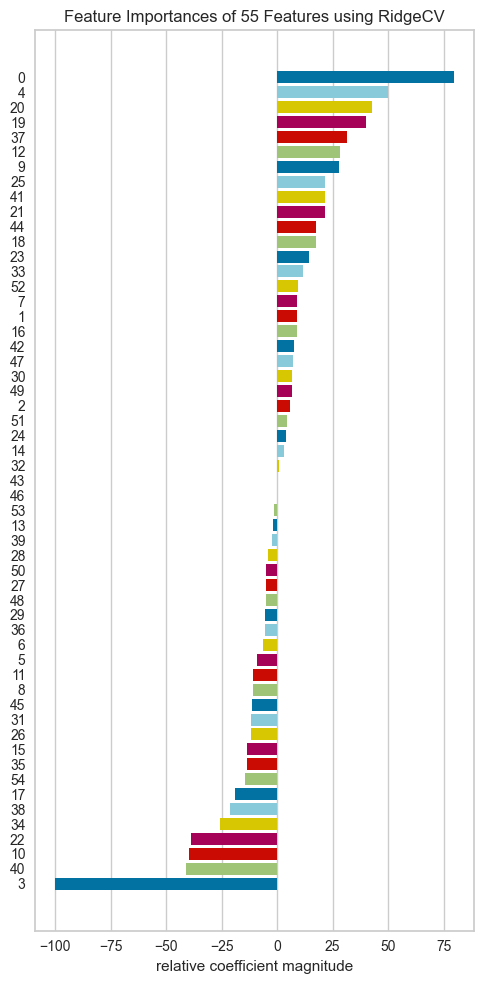

<Axes: title={'center': 'Feature Importances of 55 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [110]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz #figsize gibi işlem yapıyor görseli büyütmek için import ediyoruz altta 720, 3000 dedik
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns) #modeli veriyorum ve X_train column namelerini
visualizer = RadViz(size=(500, 1000))
viz.fit(X_train, y_train)
viz.show()

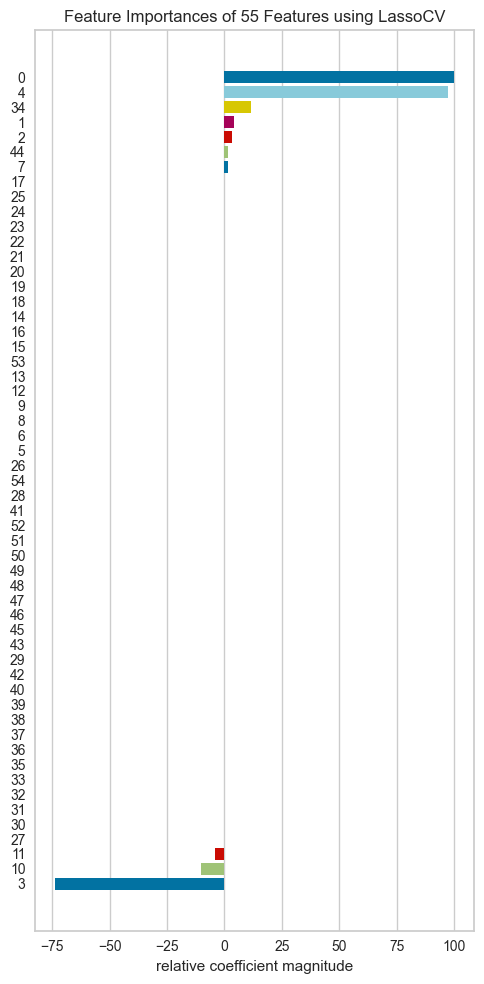

<Axes: title={'center': 'Feature Importances of 55 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [111]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(500, 1000))
viz.fit(X_train, y_train)
viz.show()